# DATA MANIPULATION

Data manipulation refers to the process of transforming and restructuring data to make it suitable for analysis or visualization. Pivot tables are a common technique used in data manipulation, especially for summarizing and aggregating data in a structured format.

#Notes:

Before you make a data manipulation, you have to check the dataset; whether the data is dirty (there are still missing values or unique data that must be cleaned) or has been clean.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#load new data

df = pd.read_csv('cosmetics.csv')

In [3]:
#view the data with ascending (by default: 5 rows only)

df.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


In [4]:
#info dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   Brand        1472 non-null   object 
 2   Name         1472 non-null   object 
 3   Price        1472 non-null   int64  
 4   Rank         1472 non-null   float64
 5   Ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


The dataset has been clean, so we can make the data manipulation~

## 2. Pivot Table

In Python, you can create pivot tables using various libraries, but one of the most commonly used ones is pandas. Pandas is a powerful data manipulation library that provides easy-to-use data structures and data analysis tools.

Make a pivot table by selected column with bar chart visualization

In [5]:
df['discount']=df['Combination']+df['Sensitive']

df['discount'][df['discount']>0]='30% off'
df['discount'][df['discount']==0]='normal price'

C:\Users\aris\AppData\Local\Temp\ipykernel_22728\825904753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['discount'][df['discount']>0]='30% off'
C:\Users\aris\AppData\Local\Temp\ipykernel_22728\825904753.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '30% off' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df['discount'][df['discount']>0]='30% off'


In [6]:
df['Item_ID']=df.index+1

In [11]:
#check the data

df.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,discount,Item_ID
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,30% off,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1,30% off,2
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0,30% off,3
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,30% off,4
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1,30% off,5


In [7]:
def make_pivot(param1, param2) :
    df_slice = df[[param1, param2, 'Item_ID']]
    slice_pivot = df_slice.pivot_table(index=[param1], columns=[param2], \
                                       aggfunc=np.size,fill_value=0)
    p_chart = slice_pivot.plot(kind='bar');
    for p in p_chart.patches:
        p_chart.annotate(str(p.get_height()), (p.get_x() * 0.35, p.get_height() * 0.1))
        return slice_pivot
        return p_chart

Item_ID             
discount    30% off normal price
Label                           
Cleanser        165          116
Eye cream       133           76
Face Mask       204           62
Moisturizer     208           90
Sun protect      97           73
Treatment       178           70

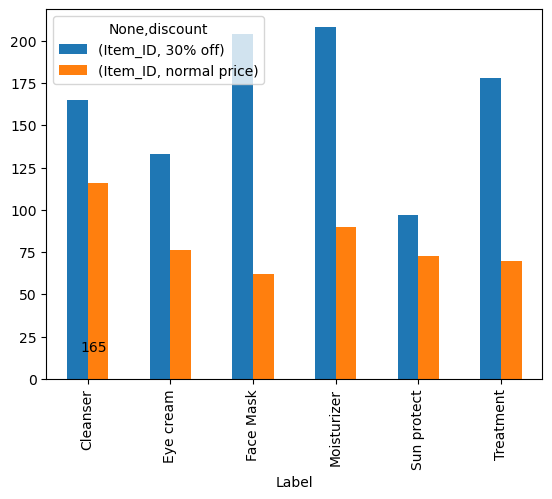

In [8]:
make_pivot('Label', 'discount')

Make a pivot table with data slice

In [9]:
df_slice = df[['Label', 'discount', 'Item_ID']]
slice_pivot = df_slice.pivot_table(index=['Label'], columns=['discount'], \
                                   aggfunc=np.size,fill_value=0)

In [10]:
slice_pivot

Item_ID             
discount    30% off normal price
Label                           
Cleanser        165          116
Eye cream       133           76
Face Mask       204           62
Moisturizer     208           90
Sun protect      97           73
Treatment       178           70

In [21]:
#added another column if you want to know the number of discounted skincare for combination skin types

df_slice = df[['Label', 'discount', 'Combination', 'Item_ID']]
slice_pivot = df_slice.pivot_table(index=['Label', 'Combination'], columns=['discount'], \
                                   aggfunc=np.size,fill_value=0)

In [22]:
slice_pivot

Item_ID             
discount                30% off normal price
Label       Combination                     
Cleanser    0                 4          116
            1               161            0
Eye cream   0                 2           76
            1               131            0
Face Mask   0                 2           62
            1               202            0
Moisturizer 0                 9           90
            1               199            0
Sun protect 0                 1           73
            1                96            0
Treatment   0                 1           70
            1               177            0